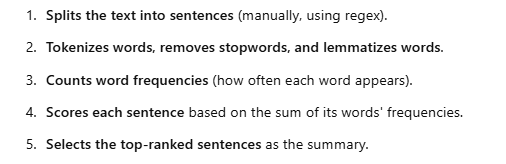

In [1]:
import nltk
import numpy as np
import string
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

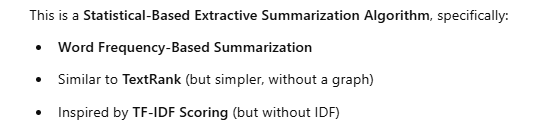

In [3]:
pattern = r'\b[^\d\w]+\b'
tokenizer = RegexpTokenizer(pattern)

In [4]:
en_stop = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [7]:
def split_into_sentences(text):
  return[sentence.strip() for sentence in text.split('.') if sentence]

In [13]:
def extractive_summary(text, num_sentences=2):
    sentences = split_into_sentences(text)  # Manually split text into sentences

    # Corrected Tokenizer Call
    words = tokenizer.tokenize(text.lower())  # Ensure correct function usage

    # Fixed Loop Variable
    words = [lemmatizer.lemmatize(word) for word in words if word not in en_stop and word not in string.punctuation]

    # Calculate word frequency
    word_freq = Counter(words)

    # Score sentences based on word frequency
    sentence_scores = {sent: sum(word_freq[word] for word in tokenizer.tokenize(sent.lower()) if word in word_freq) for sent in sentences}

    # Select top sentences for summary
    summary_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)[:num_sentences]

    return ' '.join(summary_sentences)
text1 = """Artificial Intelligence is transforming industries. Companies are investing in AI-driven solutions to enhance automation and efficiency.
AI-powered chatbots are revolutionizing customer service. Machine learning algorithms analyze vast amounts of data to provide valuable insights."""


print("Extracted Summary:\n", extractive_summary(text1))

Extracted Summary:
 Machine learning algorithms analyze vast amounts of data to provide valuable insights Companies are investing in AI-driven solutions to enhance automation and efficiency


In [14]:
text2 = """Artificial Intelligence (AI) is transforming industries worldwide.
It enables automation, improves efficiency, and enhances decision-making.
Machine Learning (ML) is a subset of AI that allows computers to learn from data.
Deep Learning, a branch of ML, uses neural networks to mimic human intelligence.
AI applications range from healthcare to finance, improving diagnosis and fraud detection.
Self-driving cars rely on AI to navigate roads safely and efficiently.
Natural Language Processing (NLP) enables machines to understand and generate human language.
Chatbots and virtual assistants use NLP to interact with users effectively.
AI-powered recommendation systems enhance user experiences in e-commerce and entertainment.
Social media platforms use AI to filter content and detect misinformation.
Cybersecurity benefits from AI through real-time threat detection and response.
AI in robotics enables automation in manufacturing and logistics.
Healthcare AI helps in medical imaging, drug discovery, and personalized treatment.
AI-driven predictive analytics aids businesses in forecasting trends and risks.
Ethical concerns around AI include bias, privacy, and job displacement.
Governments and organizations are working on AI regulations and policies.
AI is continuously evolving with advancements in computing power and data availability.
Quantum computing may revolutionize AI by solving complex problems faster.
AI research focuses on explainability and ensuring unbiased decision-making.
Despite challenges, AI holds immense potential to shape the future of humanity.
."""

print("Extractive Summary:\n", extractive_summary(text2))

Extractive Summary:
 Machine Learning (ML) is a subset of AI that allows computers to learn from data AI is continuously evolving with advancements in computing power and data availability


In [15]:
text3 = """About the job
Creates and implements an integrated roadmap for all aspects of data governance. Develops, maintains and monitors data governance policies and procedures. Deploys SQL and Python code, ensures compliance with standards, and provides updates on policy changes. Ensures that data is secure, private, accurate, available and usable. Provides interpretation of enterprise data governance guidelines. Ensures data strategy and management practices are aligned in support of business objectives. Creates a culture where data is managed as a valuable corporate asset, adheres to the regulations around data compliance, and reduces overall risk.

Drives data governance by actively promoting improved data governance practices, enforcing policy, and following data governance best practices.
Harmonizes data in the systems through a collaborative process with members from various business units.
Develops SQL and Python code to generate reports, identify data quality issues and remediations.
Establishes, maintains, periodically reviews and recommends changes to data governance policies, standards, guidelines, and procedures.
Conducts audits to ensure that policies, procedures and metrics are in place for maintaining/improving the program.
Aligns the Data Governance policy with the overall goals of the business strategy.
Drives change in the organization to maximize the value of its data and plans for how the company will make those changes.
Focus is primarily on business/group within BMO; may have broader, enterprise-wide focus.
Exercises judgment to identify, diagnose, and solve problems within given rules.
Works independently on a range of complex tasks, which may include unique situations.
Broader work or accountabilities may be assigned as needed..
."""

print("Extractive Summary:\n", extractive_summary(text3))

Extractive Summary:
 Drives change in the organization to maximize the value of its data and plans for how the company will make those changes Creates a culture where data is managed as a valuable corporate asset, adheres to the regulations around data compliance, and reduces overall risk


**T5**

In [16]:
from transformers import pipeline

In [17]:
summarizer = pipeline("summarization", model ="t5-small")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu


In [19]:
summary = summarizer(text1, max_length = 50, min_length = 20, do_sample = False)

In [21]:
print(summary[0]['summary_text'])

companies investing in AI-driven solutions to enhance automation and efficiency . AI-powered chatbots analyze vast amounts of data to provide valuable insights .


In [24]:
summary2 = summarizer(text2, max_length = 100, min_length = 40, do_sample = False)

In [25]:
print(summary2[0]['summary_text'])

artificial intelligence (AI) is transforming industries worldwide . it enables automation, improves efficiency, and enhances decision-making . AI applications range from healthcare to finance, improving diagnosis and fraud detection .


In [26]:
summary3 = summarizer(text3, max_length = 200, min_length = 50, do_sample = False)

In [27]:
print(summary3[0]['summary_text'])

about the job Creates and implements an integrated roadmap for all aspects of data governance . Deploys SQL and Python code, ensures compliance with standards, and provides updates on policy changes . creates a culture where data is managed as a valuable corporate asset, adheres to the regulations around data compliance .
